In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
books=pd.read_csv('G:\Jupyter\Book\BX-Books.csv',sep=';',error_bad_lines=False,encoding='Latin-1')
ratings=pd.read_csv('G:\Jupyter\Book\BX-Book-Ratings.csv',sep=';',error_bad_lines=False,encoding='Latin-1')
users=pd.read_csv('G:\Jupyter\Book\BX-Users.csv',sep=';',error_bad_lines=False,encoding='Latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print(ratings.shape)
ratings.head(10)

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [5]:
ratings['User-ID'].nunique()

105283

In [6]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [7]:
count=ratings['Book-Rating'].value_counts()
count

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [8]:
ratings=ratings[ratings['Book-Rating'].isin(count[count>=100].index)]

In [9]:
ratings.shape

(1149780, 3)

In [10]:
print(users.shape)
users.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


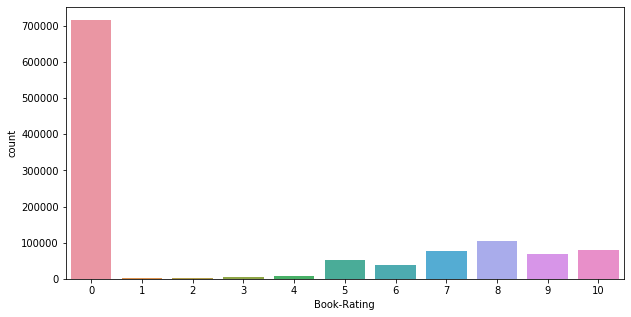

In [11]:
plt.figure(figsize=(10,5))
sb.countplot(x='Book-Rating',data=ratings)

In [12]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

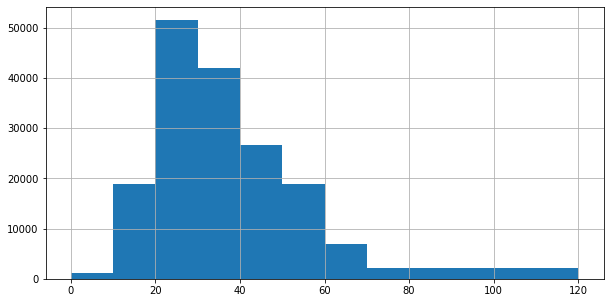

In [13]:
plt.figure(figsize=(10,5))
users['Age'].hist(bins=[0,10,20,30,40,50,60,70,120])

In [14]:
rating_df=pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
rating_df['rating_count']=ratings.groupby('ISBN')['Book-Rating'].count()
rating_df.rename(columns={'Book-Rating':'Mean_rating'},inplace =True)
rating_df.sort_values("rating_count",ascending=False).head()

,Mean_rating,rating_count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [15]:
count=ratings['User-ID'].value_counts().reset_index()

In [16]:
count.head()

,index,User-ID
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850


In [17]:
count.rename(columns={'index':'User-ID','User-ID':'rating_count_PerUSer'},inplace=True)

In [18]:
count.tail()

,User-ID,rating_count_PerUSer
105278,158698,1
105279,17920,1
105280,277135,1
105281,275086,1
105282,187812,1


In [19]:
ratings=ratings.merge(count, on='User-ID')



In [20]:
ratings=ratings.merge(rating_df, on='ISBN',copy=False)

In [22]:
ratings.sort_values('rating_count',ascending=False).head()

,User-ID,ISBN,Book-Rating,rating_count_PerUSer,Mean_rating,rating_count
12039,195762,0971880107,0,1,1.019584,2502
10368,7125,0971880107,0,167,1.019584,2502
10375,8453,0971880107,3,2,1.019584,2502
10374,8361,0971880107,2,1,1.019584,2502
10373,7864,0971880107,0,39,1.019584,2502


In [23]:
ratings['rating_count_PerUSer'].max()

13602

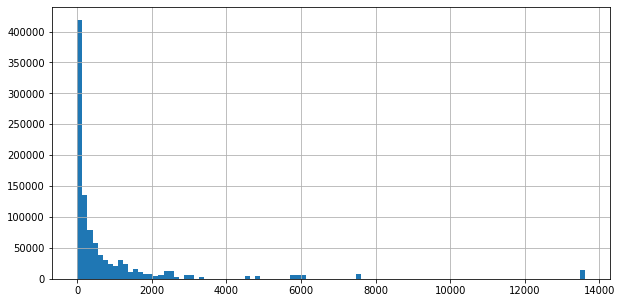

In [43]:
plt.figure(figsize=(10,5))
ratings['rating_count_PerUSer'][ratings['rating_count_PerUSer']>5].hist(bins=(100))

In [35]:
count['rating_count_PerUSer'].describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: rating_count_PerUSer, dtype: float64

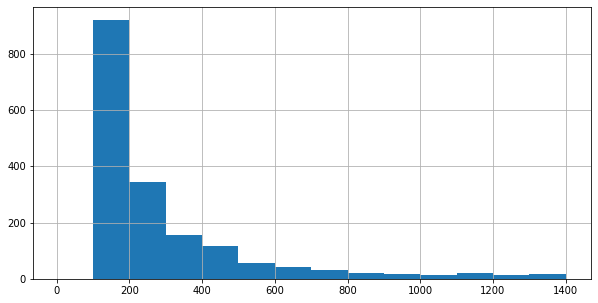

In [42]:
plt.figure(figsize=(10,5))
count['rating_count_PerUSer'][count['rating_count_PerUSer']>100].hist(bins=[5,10,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400])

In [52]:
rating_df['rating_count'].describe()

count    340556.000000
mean          3.376185
std          12.436252
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2502.000000
Name: rating_count, dtype: float64

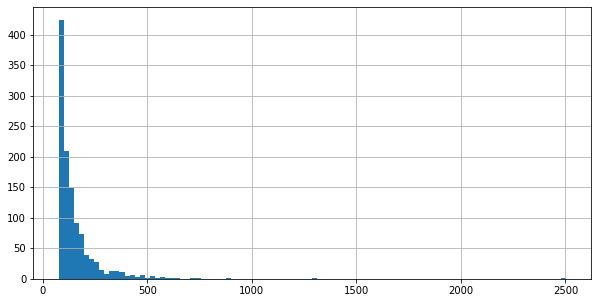

In [70]:
plt.figure(figsize=(10,5))
rating_df['rating_count'][rating_df['rating_count']>75].hist(bins=(100))

In [71]:
ratings=ratings.query('rating_count_PerUSer >=200')
ratings=ratings.query('rating_count >=75')

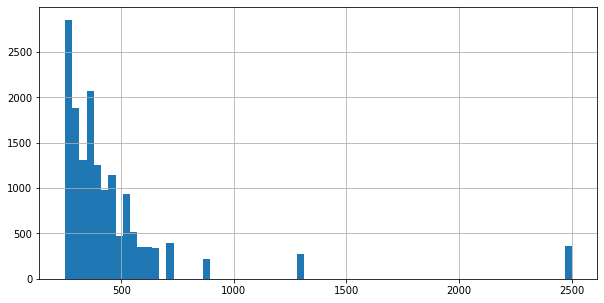

In [72]:
plt.figure(figsize=(10,5))
ratings['rating_count'].hist(bins=(70))

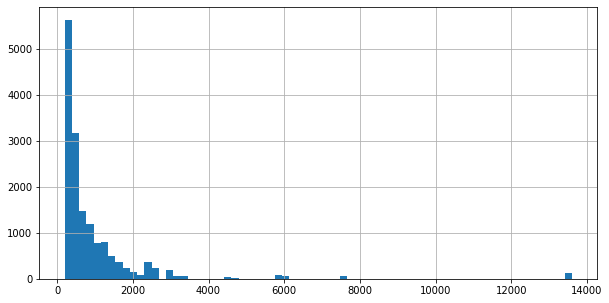

In [73]:
plt.figure(figsize=(10,5))
ratings['rating_count_PerUSer'].hist(bins=(70))

In [74]:
movies_pivot=ratings.pivot(index='User-ID',columns='ISBN',values='Book-Rating')
movies_pivot.head()

ISBN,0060392452,0060502258,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060987103,0061009059,...,0786868716,080410526X,0804106304,080410753X,0804114986,0805063897,0842329129,0971880107,1400034779,1558743669
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
2766,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
2977,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3363,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN


In [75]:
example=movies_pivot['0385504209']
same_as_exmp=movies_pivot.corrwith(example)
exmp_corr=pd.DataFrame(same_as_exmp,columns=['pearson_count'])
exmp_corr.dropna(inplace=True)

In [76]:
exmp_relation=exmp_corr.join(rating_df['rating_count'])
exmp_relation.sort_values('pearson_count',ascending=False).head(10)

,pearson_count,rating_count
ISBN,,
0385504209,1.000000,883
0380731851,0.526855,289
044651652X,0.524773,368
0345391055,0.447904,259
044022165X,0.434780,386
006101351X,0.368629,364
0312278586,0.367703,474
0440222656,0.350079,420
0060987103,0.349445,326
